# <p style="text-align: center;"> <b>Question 3</b></p>
---

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #867FEE; font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents ✍️</b></h3>

- [1. Question](#1)
    - [1.1 The purpose of the question](#1.1)
    - [1.2 How to solve the question](#1.2)
- [2. Solution](#2)
- [3. Answer the question](#3)

<a class="anchor" id="1"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Question  </div>
- How can we suggest songs based on a user's current listening preferences?


<a class="anchor" id="1.1"></a>
## <span style='color:#2B9C15 '> 1.1 The purpose of the question 👁️‍🗨️ </span>

- The goal is to recommend songs to users based on the similarity between songs, helping listeners discover music they might enjoy based on their preferences. We assume that if a user likes a particular song, they may also enjoy songs that are similar to it.


<a class="anchor" id="1.2"></a>
## <span style='color:#2B9C15 '> 1.2 How to solve the question 📊 </span>

- **Using Euclidean Distance as a Foundation:**
    - Use Euclidean distance to measure the similarity between songs. The smaller the Euclidean distance, the more similar two songs are from the perspective of the selected features.
    - Select K songs with the smallest distances. These are the songs that the system highly rates in similarity to the user's liked song.
    - Extract information such as song names and artists from the selected songs and return this information as recommendations for the user.




<a class="anchor" id="2"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Solution  </div>


### 
### <span style='color:#2B9C15 '> 📕 Implementation Steps</span>
- Data Preparation:
    - Drop the 'time_signature' and 'key' columns.
    - Drop rows with duplicate 'track_id'.
    - Standardize the data.
- Calculate the Euclidean distance between each song in the dataset and the recently listened song by the user.
- Retrieve the songs with the smallest distances, which are the recommended songs for the user.
- Extract information for each recommended song.

### 
### <span style='color:#2B9C15 '> 📕 Import Libraries</span>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

### 
### <span style='color:#2B9C15 '> 📕 Preprocessing</span>
- Read data from a CSV file and exclude the columns `time_signature` and `key`.
    - The removal of the 'time_signature' and 'key' columns is due to their categorical nature. While it's possible to encode them, doing so may impact the results of the recommendation process.


In [2]:
df = pd.read_csv('./data/cleaned_dataset.csv')
df = df.drop(['time_signature', 'key'], axis=1)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


- Because dataset can contains duplicate rows that have the same song in different albums or singles, we need to remove these duplicates.

In [3]:
df.drop_duplicates(subset=['track_id'], inplace=True)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


### 
### <span style='color:#2B9C15 '> 📕 Normalizing Data</span>

To avoid the influence of different units of measurement, we need to normalize the data by these steps:

- Utilize `MinMaxScaler` to normalize numerical features within the DataFrame.
- Create a new DataFrame, `data_norm`, from the normalized data and set the `track_id` column as the index.

In [4]:
scaler = preprocessing.MinMaxScaler()

numerical_cols = df.select_dtypes(include=np.number).columns
data_norm = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols, index=df['track_id'])

### 
### <span style='color:#2B9C15 '> 📕 Identify the track that the user has recently listened to.</span>
- Identify the track that the user has recently listened to based on the song's name.
- Retrieve the track_id corresponding to the mentioned track
#### 👉 Assuming the user recently listened to the song "Do Not Let Me Go."

In [5]:
# listTrackNameListened = ['Heavy Heart', 'Somebody Else - Acoustic', 'Always Be My Baby']
trackNameListened = 'Do Not Let Me Go'
track_id = df[(df['track_name'] == trackNameListened)][['track_id']]
track_id = track_id.values[0][0]

target_track = list(data_norm.loc[track_id])



### 
### <span style='color:#2B9C15 '> 📕 Euclidean Distance Calculation</span>
- Use a for loop to iterate through all rows in `data_norm`.
- At each iteration, calculate the Euclidean distance between the feature vector of the considered track `obj` and the feature vector of the `target_track`.
- The results are stored to the `euclidean` column of the DataFrame `data_result`.

In [6]:
data_result = pd.DataFrame()
data_result['euclidean'] = [distance.euclidean(obj, target_track) for index, obj in data_norm.iterrows()]
data_result['track_id'] = data_norm.index

### The purpose of the chart

- Provide an idea of the similarity or dissimilarity levels of paths compared to the target path. It shows trends in the distances between the target variables and the dataset.

- Clusters in the chart may indicate groups of songs that are more similar. Peaks or modes in the chart can represent distinct groups or patterns in your data."

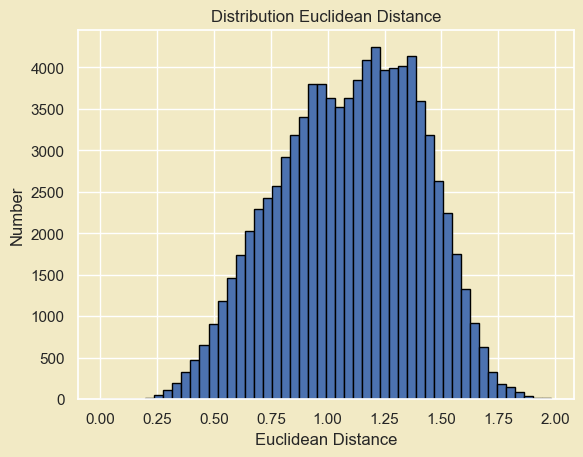

In [7]:

plt.hist(data_result['euclidean'], bins=50, edgecolor='black')

plt.xlabel('Euclidean Distance')
plt.ylabel('Number')

plt.title('Distribution Euclidean Distance')

plt.show()

### 
### <span style='color:#2B9C15 '> 📕 Get recommended tracks</span>

- Sort the DataFrame `data_result` based on the `euclidean` column and select the top 6 tracks with the smallest distances (including itself)

In [8]:
data_rec = data_result.sort_values(by=['euclidean']).iloc[:6]


### 
### <span style='color:#2B9C15 '> 📕 Extract Information of Recommended Tracks</span>

- Create a DataFrame `data_big` from the original dataset and set the 'track_id' column as the index.
- Iterate through the recommended tracks, extract information about the song name and artist from the original DataFrame, and save it into the `track_list` DataFrame.


In [9]:
data_init = df.set_index(df.loc[:, 'track_id'])
track_list = pd.DataFrame()
for i in list(data_rec.loc[:, 'track_id']):
    if i in list(df.loc[:, 'track_id']):
        track_info = data_init.loc[[i], ['track_name', 'artists']]
        track_list = pd.concat([track_list, track_info], ignore_index=True)

## 

<a class="anchor" id="3"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Answer the question  </div>

- Recommend the top 5 tracks for the user in descending order of similarity, based on the calculated Euclidean distances.

In [10]:
recomended = track_list.values.tolist()
print(f"""You've just listened:  \n \t - {recomended[0][0]} - {recomended[0][1]} 
Now you may listen : 
\n \t - '{recomended[1][0]} - {recomended[1][1]}'
Or any of:
\n \t - '{recomended[2][0]} - {recomended[2][1]}' 
\n \t - '{recomended[3][0]} - {recomended[3][1]}'
\n \t - '{recomended[4][0]} - {recomended[4][1]}'
\n \t - '{recomended[5][0]} - {recomended[5][1]}'  """)

You've just listened:  
 	 - Do Not Let Me Go - Joshua Hyslop 
Now you may listen : 

 	 - 'Through the Barricades - Remastered - Spandau Ballet'
Or any of:

 	 - 'A Pillow of Winds - Pink Floyd' 

 	 - 'We Fall Down - Chris Tomlin'

 	 - 'How Long Will I Love You - Bonus Track - Ellie Goulding'

 	 - 'Hasta mi final - Il Divo'  


<div style="text-align: left; background-color:#867FEE; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">END</div>